<a href="https://colab.research.google.com/github/XingGuoFang/COVID19-SEIR-Modeling-Orange-County/blob/main/%E5%9B%BE%E8%A1%A8%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [ ]:
def seir_model(y, t, N, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

In [ ]:
# 1. 基本设定
N = 52000          # 假设 Aliso Viejo 总人口
E0, I0, R0 = 10, 1, 0  # 初始：10个潜伏，1个感染，0个康复
S0 = N - E0 - I0 - R0
y0 = [S0, E0, I0, R0]

# 2. 科学参数 (根据 2020-2022 真实情况预估)
beta = 0.35   # 传染率
sigma = 1/5   # 潜伏期平均 5 天
gamma = 1/10  # 康复期平均 10 天

# 3. 计算时间轴 (150 天)
t = np.linspace(0, 150, 150)

# 4. 执行模拟
res = odeint(seir_model, y0, t, args=(N, beta, sigma, gamma))
S, E, I, R = res.T
print("计算完成！")

计算完成！


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26131 (\N{CJK UNIFIED IDEOGRAPH-6613}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24863 (\N{CJK UNIFIED IDEOGRAPH-611F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28508 (\N{CJK UNIFIED IDEOGRAPH-6F5C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20239 (\N{CJK UNIFIED IDEOGRAPH-4F0F}) missing from font(s) DejaVu Sans.
  fig.canvas

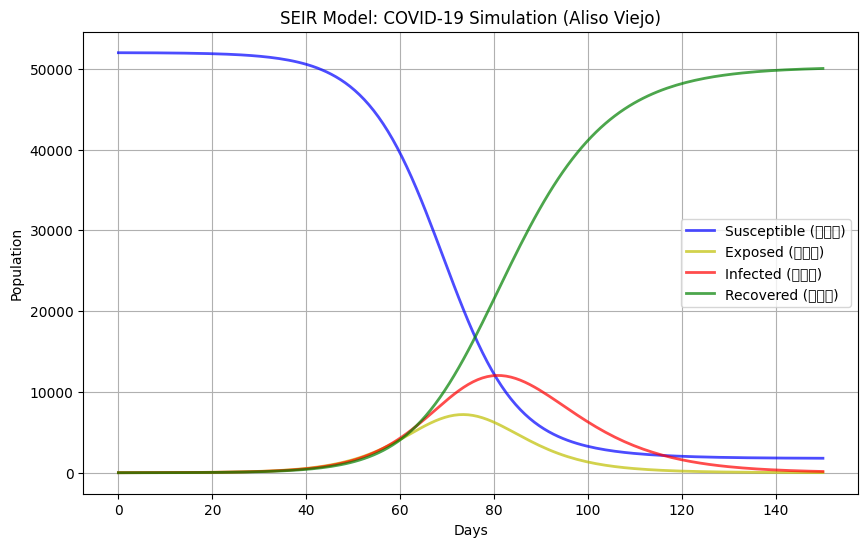

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(t, S, 'b', alpha=0.7, lw=2, label='Susceptible (易感者)')
plt.plot(t, E, 'y', alpha=0.7, lw=2, label='Exposed (潜伏者)')
plt.plot(t, I, 'r', alpha=0.7, lw=2, label='Infected (感染者)')
plt.plot(t, R, 'g', alpha=0.7, lw=2, label='Recovered (康复者)')

plt.title("SEIR Model: COVID-19 Simulation (Aliso Viejo)")
plt.xlabel("Days")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26080 (\N{CJK UNIFIED IDEOGRAPH-65E0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24178 (\N{CJK UNIFIED IDEOGRAPH-5E72}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20005 (\N{CJK UNIFIED IDEOGRAPH-4E25}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas

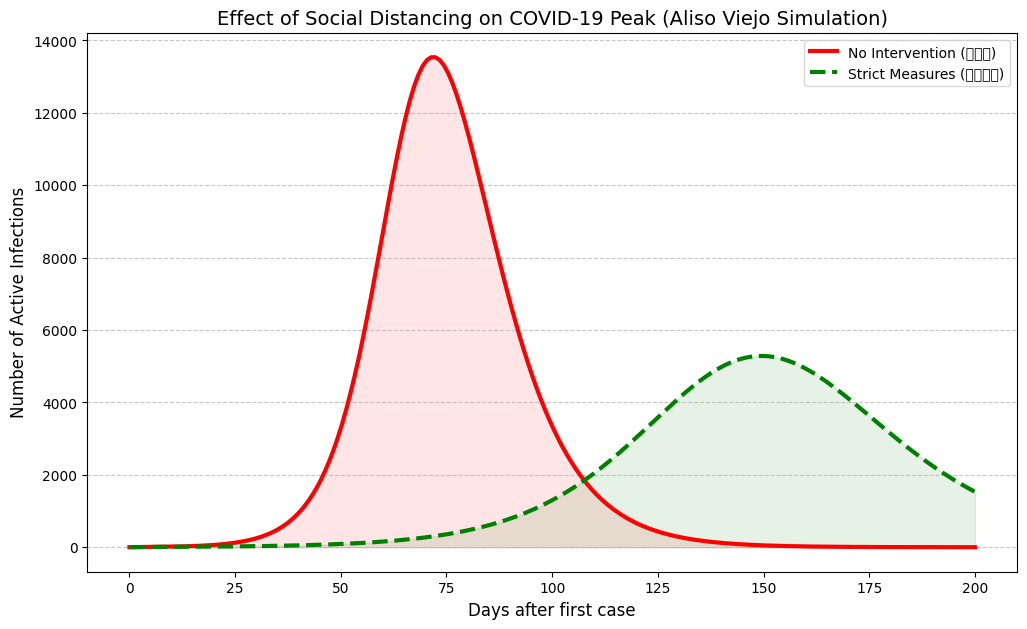

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 1. 定义模型
def seir_model(y, t, N, beta, sigma, gamma):
    S, E, I, R = y
    return [-beta * S * I / N, beta * S * I / N - sigma * E, sigma * E - gamma * I, gamma * I]

# 2. 设置初始条件 (假设 Aliso Viejo 人口 52,000)
N, t = 52000, np.linspace(0, 200, 200)
y0 = [N-11, 10, 1, 0] # S, E, I, R
sigma, gamma = 1/5, 1/10 # 潜伏期5天，康复10天

# 3. 运行两个不同的场景
# 场景 A: 无干预 (传染率高)
beta_high = 0.4
res_high = odeint(seir_model, y0, t, args=(N, beta_high, sigma, gamma))

# 场景 B: 严格防疫 (传染率降低 50%)
beta_low = 0.2
res_low = odeint(seir_model, y0, t, args=(N, beta_low, sigma, gamma))

# 4. 提取感染者 (Infected) 数据进行对比
I_high = res_high[:, 2]
I_low = res_low[:, 2]

# 5. 可视化绘图
plt.figure(figsize=(12, 7))
plt.plot(t, I_high, 'r', lw=3, label='No Intervention (无干预)')
plt.plot(t, I_low, 'g--', lw=3, label='Strict Measures (严格防疫)')

# 填充颜色让对比更明显
plt.fill_between(t, I_high, color='red', alpha=0.1)
plt.fill_between(t, I_low, color='green', alpha=0.1)

plt.title("Effect of Social Distancing on COVID-19 Peak (Aliso Viejo Simulation)", fontsize=14)
plt.xlabel("Days after first case", fontsize=12)
plt.ylabel("Number of Active Infections", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

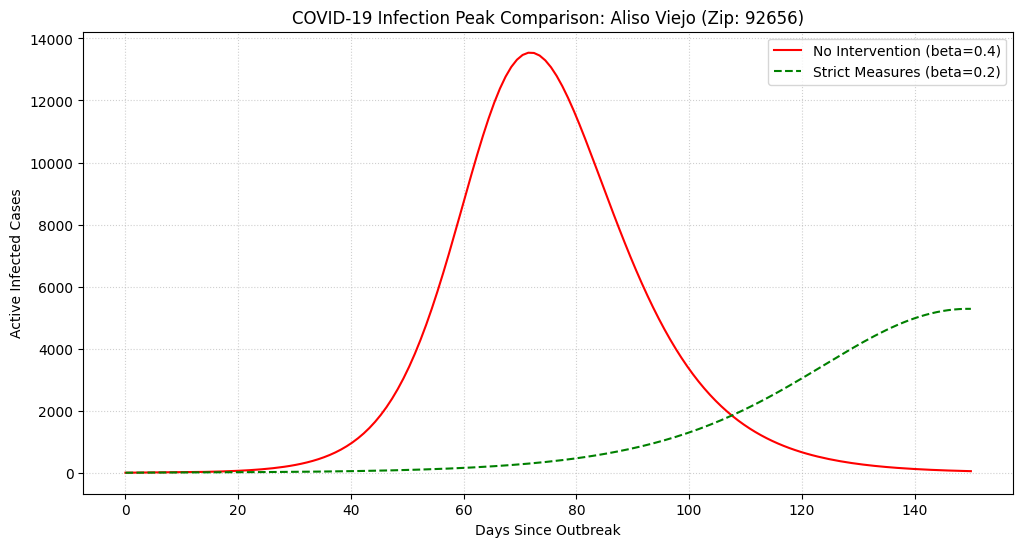

场景 A 峰值人数: 13539
场景 B 峰值人数: 5283


In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ==========================================
# 第一部分：设置你的实验参数 (修改这里即可)
# ==========================================
CITY_NAME = "Aliso Viejo (Zip: 92656)"
N = 52000          # 总人口
DAYS = 150         # 模拟时长
INITIAL_E = 10     # 初始潜伏人数
INITIAL_I = 1      # 初始感染人数

# 科学参数 (基于 CDC 数据)
SIGMA = 1/5        # 潜伏期倒数 (假设 5 天)
GAMMA = 1/10       # 康复率 (假设 10 天)

# 实验对比：设置两个不同的传染率 beta
BETA_NO_MASK = 0.4    # 场景 A: 不戴口罩/无社交距离
BETA_WITH_MASK = 0.2  # 场景 B: 严格防疫
# ==========================================

# 定义数学模型
def seir_model(y, t, N, beta, sigma, gamma):
    S, E, I, R = y
    return [-beta*S*I/N, beta*S*I/N - sigma*E, sigma*E - gamma*I, gamma*I]

# 运行计算
t = np.linspace(0, DAYS, DAYS)
y0 = [N - INITIAL_E - INITIAL_I, INITIAL_E, INITIAL_I, 0]

res_a = odeint(seir_model, y0, t, args=(N, BETA_NO_MASK, SIGMA, GAMMA))
res_b = odeint(seir_model, y0, t, args=(N, BETA_WITH_MASK, SIGMA, GAMMA))

# 绘图区
plt.figure(figsize=(12, 6))
plt.plot(t, res_a[:, 2], 'r-', label=f'No Intervention (beta={BETA_NO_MASK})')
plt.plot(t, res_b[:, 2], 'g--', label=f'Strict Measures (beta={BETA_WITH_MASK})')

plt.title(f"COVID-19 Infection Peak Comparison: {CITY_NAME}")
plt.xlabel("Days Since Outbreak")
plt.ylabel("Active Infected Cases")
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

print(f"场景 A 峰值人数: {int(max(res_a[:, 2]))}")
print(f"场景 B 峰值人数: {int(max(res_b[:, 2]))}")